In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
beml_df = pd.read_csv("BEML.csv")
beml_df.head()

In [ ]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df.head()

In [ ]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [ ]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [ ]:
glaxo_df

In [ ]:
beml_df.dtypes

Date      object
Close    float64
dtype: object

In [ ]:
glaxo_df.dtypes

Date      object
Close    float64
dtype: object

In [ ]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [ ]:
beml_df.head() # now date col is acting as an index

In [ ]:
glaxo_df.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')

In [ ]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [ ]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [ ]:
glaxo_df

In [ ]:
beml_df

In [ ]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

In [ ]:
glaxo_df

In [ ]:
beml_df

In [ ]:
#Plot the gains
plt.figure(figsize = (8, 5))
plt.plot(glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')

In [ ]:
plt.figure(figsize = (8, 5))
plt.plot(beml_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')

Text(0, 0.5, 'Density')

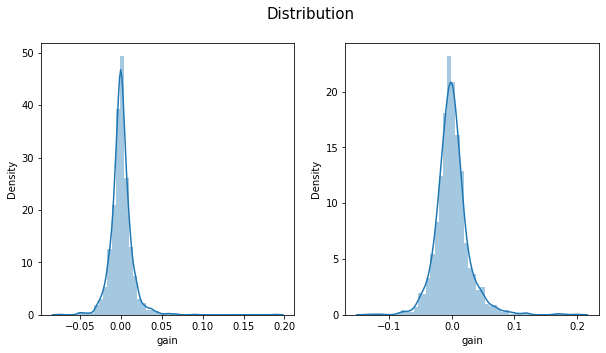

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.suptitle('Distribution',fontsize=15)

sn.distplot(glaxo_df.gain, label = 'Glaxo')

plt.xlabel('gain')
plt.ylabel('Density')

plt.subplot(1,2,2)
sn.distplot(beml_df.gain, label = 'BEML')

plt.xlabel('gain')
plt.ylabel('Density')

In [ ]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [ ]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


In [ ]:
from scipy import stats
# import scipy
#Probability of making 2% loss or higher in Glaxo - left of 0 i.e.e -0.02
stats.norm.cdf(-0.02,0.0004, 0.0134)
#loc=glaxo_df.gain.mean(),
#scale=glaxo_df.gain.std()) # there are 6% of chances having 2% or higher loss

0.06395593743937553

In [ ]:
#Probability of making 2% gain or higher in Glaxo - to the right of 0.02
1 - stats.norm.cdf(0.02,0.0004, 0.0134) # 7% chances of having at least 2% or higher gain, Glaxo seems safer than BEML


0.07177658173190637

### Inclass Exercise

### Compute 2% loss or gain for BEML

In [ ]:
stats.norm.cdf( -0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22155987503755292

In [ ]:
#Probability of making 2% gain or higher in BEML
1 - stats.norm.cdf(0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22769829484075355